In [44]:
import os
import pickle
import numpy as np
import sklearn
import matplotlib.pyplot as plt
data_path = "../data"


# read features we extracted

In [4]:
with open(data_path+"/"+"cluster_eigenvalues.txt",'rb') as rf:
    eigenvalues = pickle.load(rf)
with open(data_path+"/"+"cluster_labels.txt",'rb') as rf:
    pointlabels = pickle.load(rf)

# make sure the data type is ndarray

In [5]:
eigenvalues = np.array(eigenvalues)
pointlabels = np.array(pointlabels)
pointslabels = pointlabels.reshape((-1,1))

In [6]:
print(eigenvalues.shape,pointlabels.shape)


(500, 9) (500,)


# load and test model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

# test hyper parameter chooose

In [8]:
X_train, X_test, y_train, y_test = \
    train_test_split(eigenvalues, pointlabels, test_size=0.333, random_state=42)


In [94]:
#all possible kernel provided by SKLEARN

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_performance={'linear':[], 'poly':[], 'rbf':[],'sigmoid':[]}

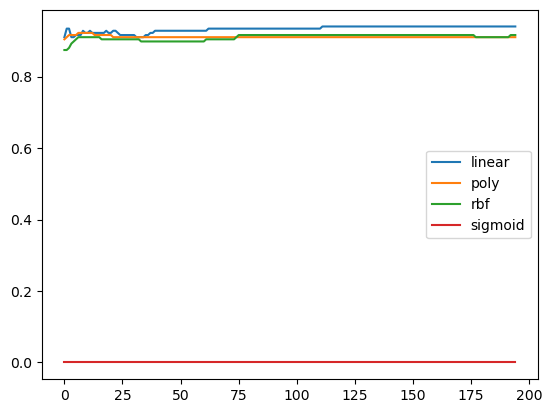

0.9401197604790419 11.600000000000001


In [95]:
max_accuracy = 0
c = 0
for kernel in kernels:
    for i in range(5,200):
        clf = svm.SVC(C=i*0.1,gamma=0.05,kernel = kernel,degree = 5,coef0=0.2)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i*0.1
        kernel_performance[kernel].append(z)
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)     

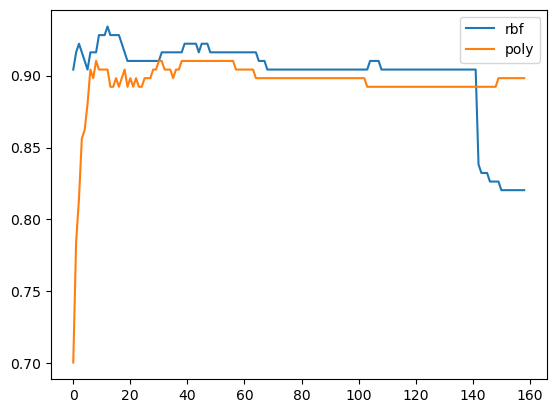

0.9341317365269461 0.013000000000000001


In [87]:
kernels = ['rbf','poly']
kernel_performance={ 'rbf':[],'poly':[]}
max_accuracy = 0
c = 0
for kernel in kernels:
    for i in range(1,160):
        clf = svm.SVC(C=11,gamma=i*0.001,kernel = kernel,degree = 5,coef0=0.2)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i*0.001
        kernel_performance[kernel].append(z)
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)   

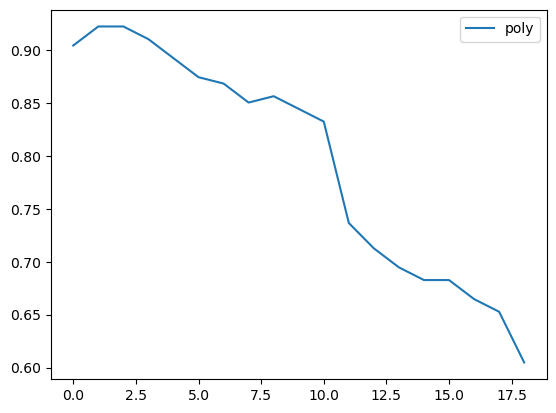

0.9221556886227545 2


In [91]:
max_accuracy = 0
c = 0
kernels = ['poly',]
kernel_performance={'linear':[], 'poly':[],'sigmoid':[]}
for kernel in kernels:
    for i in range(1,20):
        clf = svm.SVC(C=11,kernel = kernel,gamma=0.013,degree =i )
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
        kernel_performance[kernel].append(z)
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)  

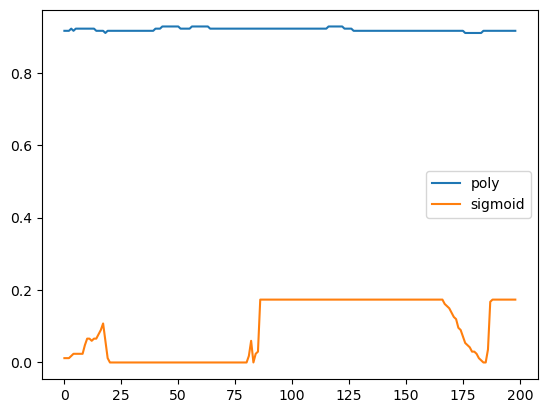

0.9281437125748503 44


In [96]:
max_accuracy = 0
c = 0
kernels = ['poly','sigmoid']
kernel_performance={'poly':[],'sigmoid':[]}
for kernel in kernels:
    for i in range(1,200):
        clf = svm.SVC(C=11,kernel = kernel,gamma=0.013,degree =2,coef0=i*0.1)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
        kernel_performance[kernel].append(z)
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)  

linear


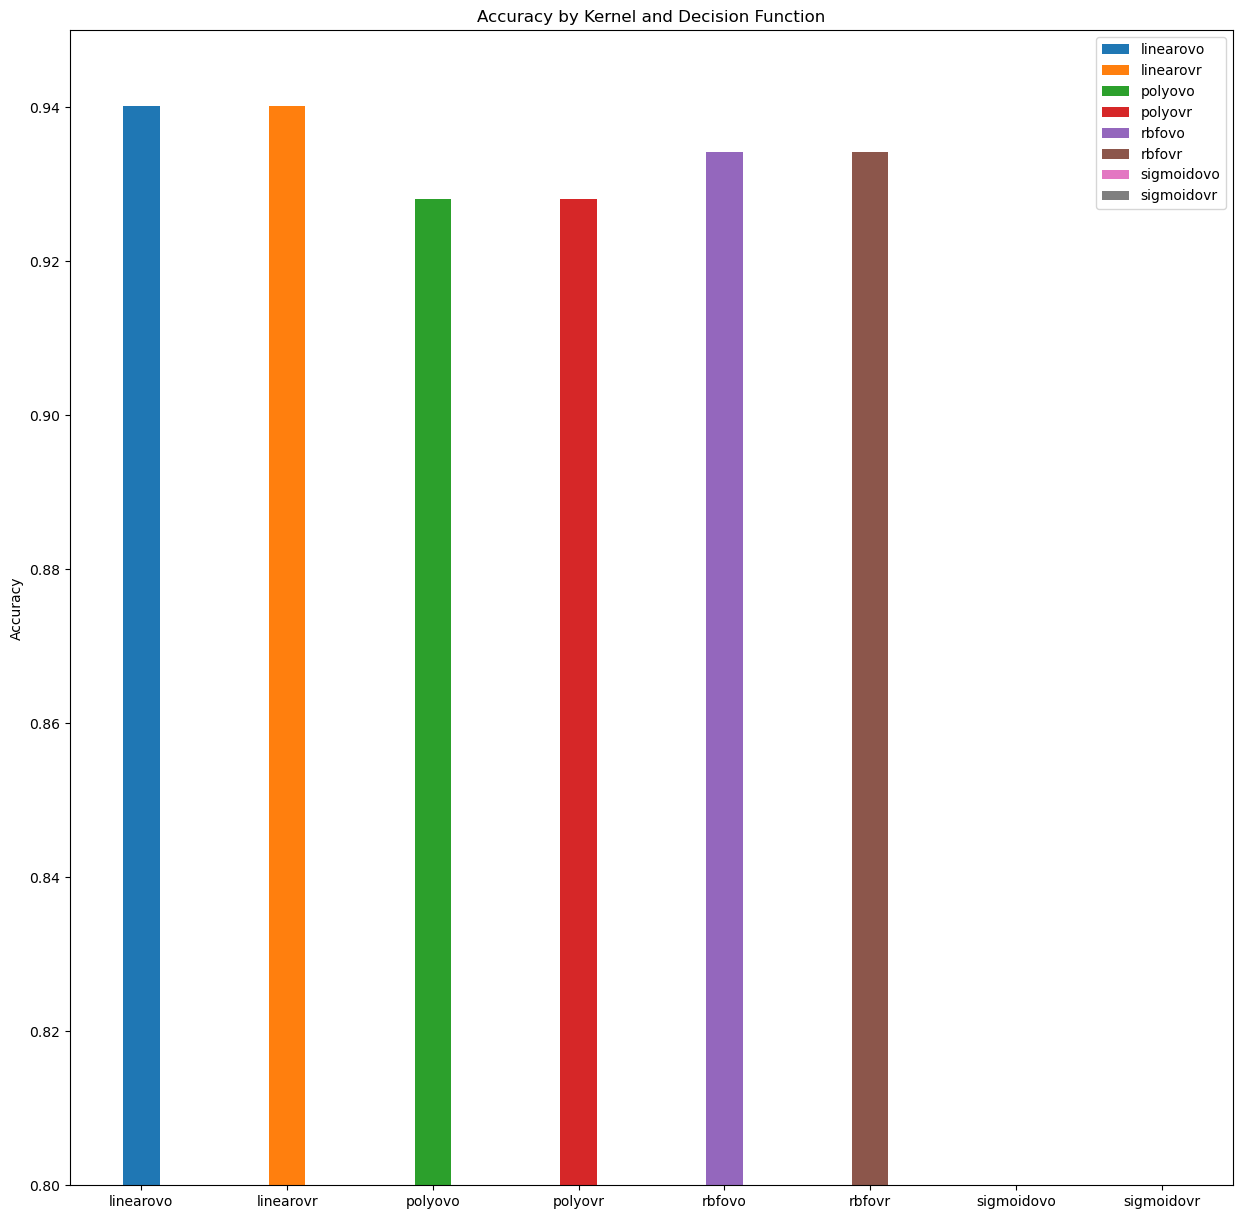

0.9401197604790419 ovo


In [141]:
max_accuracy = 0
c = 0
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_performance={'linear':[], 'poly':[], 'rbf':[],'sigmoid':[]}
for kernel in kernels:
    for i in ['ovo','ovr']:
        clf = svm.SVC(C=11.6,gamma=0.013,kernel = kernel,degree = 2,coef0=4.4,decision_function_shape=i)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
            print(kernel)
        kernel_performance[kernel].append(z)
        


x = np.arange(len(kernels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,15))
for i, kernel in enumerate(kernels):
    ax.bar(kernel+'ovo', kernel_performance[kernel][0], width, label=kernel+'ovo')
    ax.bar(kernel+'ovr', kernel_performance[kernel][1], width, label=kernel+'ovr')
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Kernel and Decision Function')


ax.legend()
ax.set_ylim(0.8,0.95)
plt.show()
print(max_accuracy,c)   

# colcutsion
## the linear kernel performs best
## C: almost all kernel need a large c, the best c is approximate 11 (no big fluncutation after 11)
## gamma:0.013, accuracy decrease if it is too large in rbf, poly kernel slightly decrease as well
## degree 2
## coef0 no big effect, 4-5 is best
## sigmoid performance worst, not suitable to be a kernel

In [143]:
clf = svm.SVC(C=11,kernel = 'linear',decision_function_shape='ovo')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=11, decision_function_shape='ovo', kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.88      1.00      0.94        29
           2       0.97      0.92      0.94        37
           3       0.97      0.84      0.90        38
           4       0.92      0.97      0.94        34

    accuracy                           0.93       167
   macro avg       0.93      0.94      0.93       167
weighted avg       0.94      0.93      0.93       167




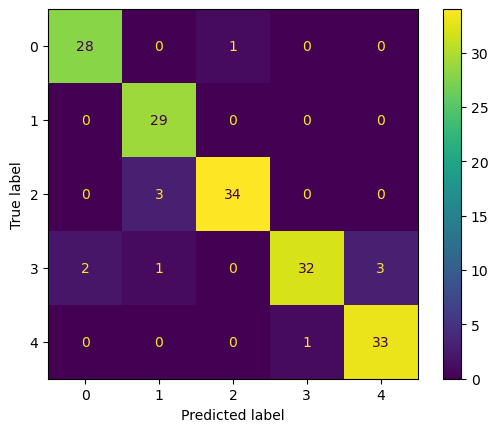

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

# Learning curve

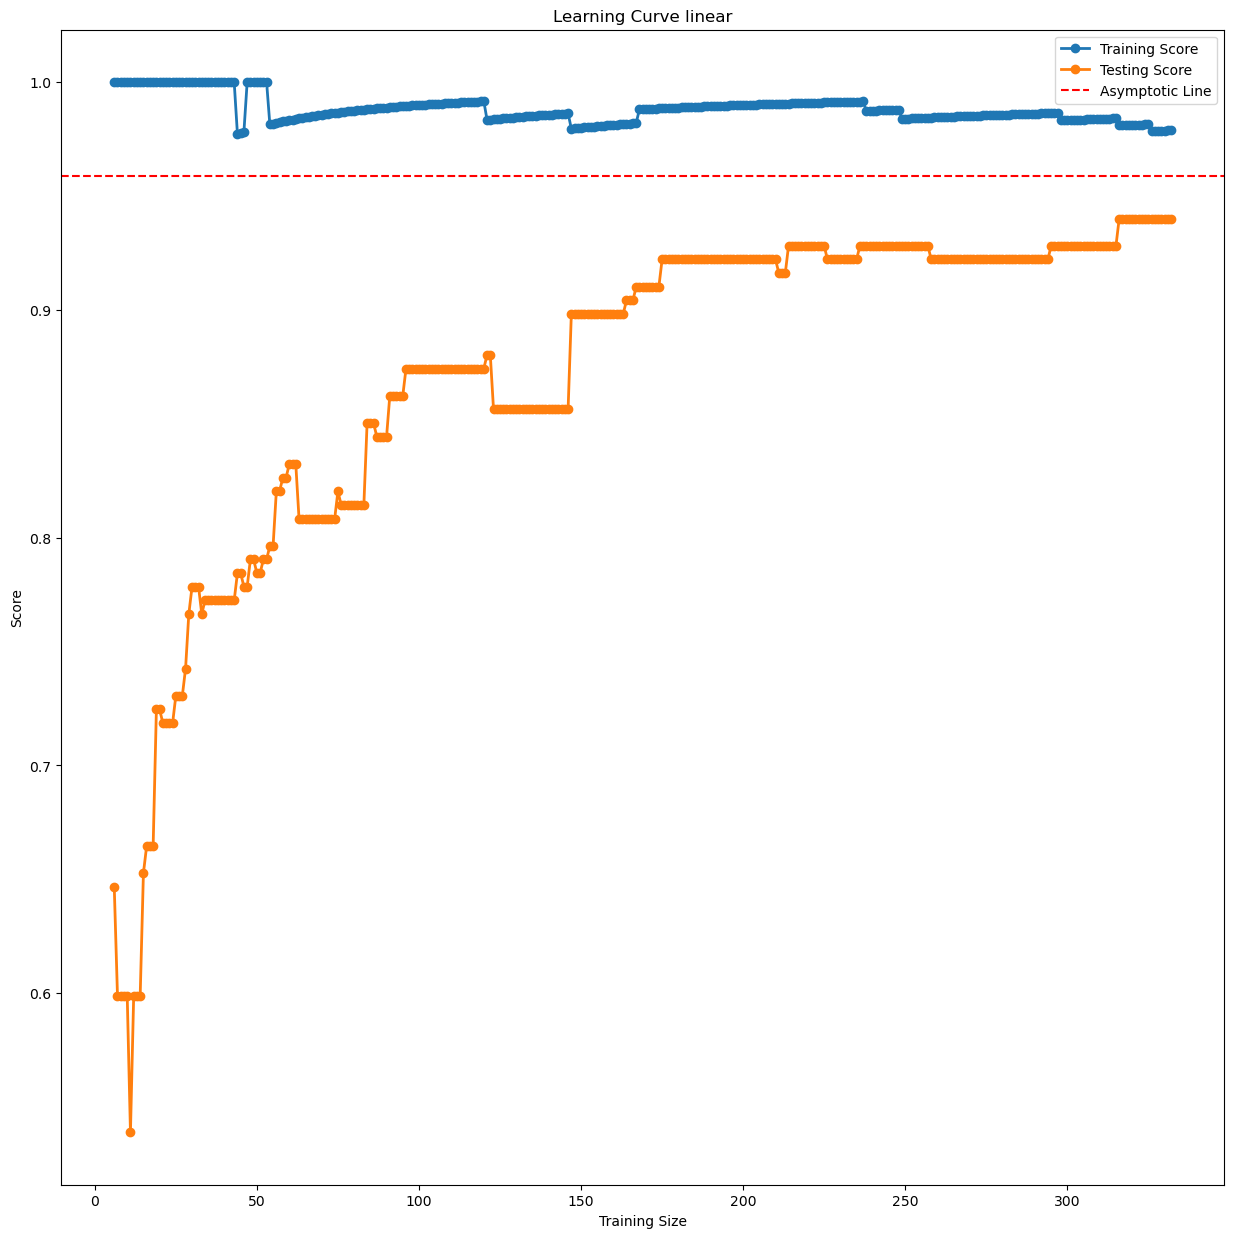

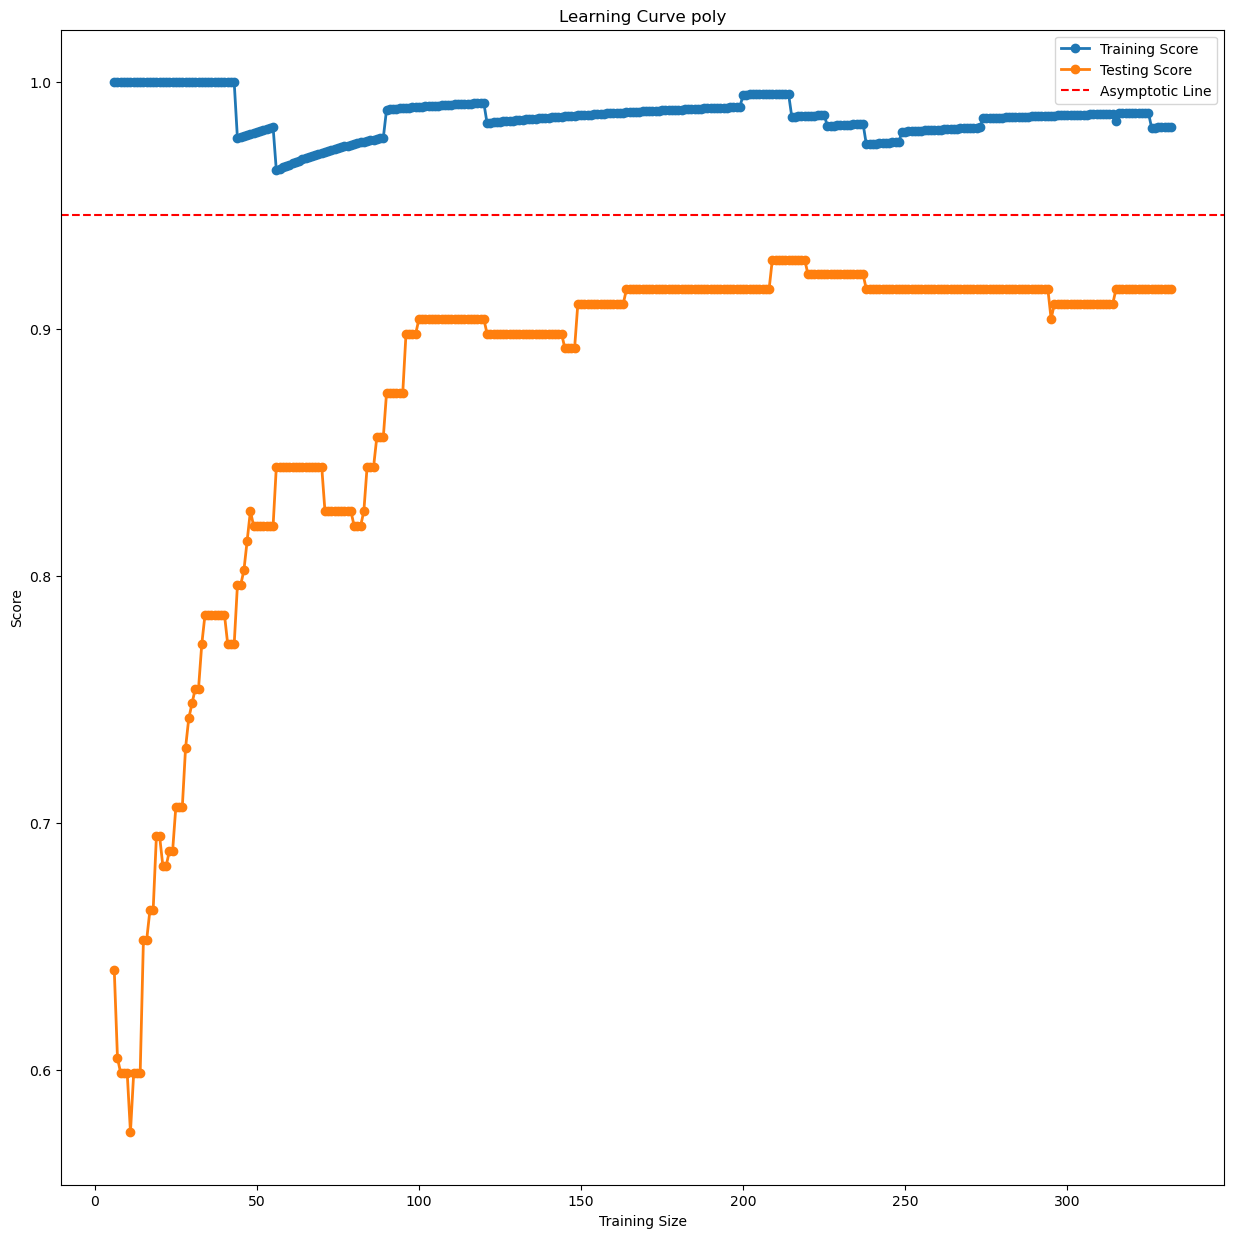

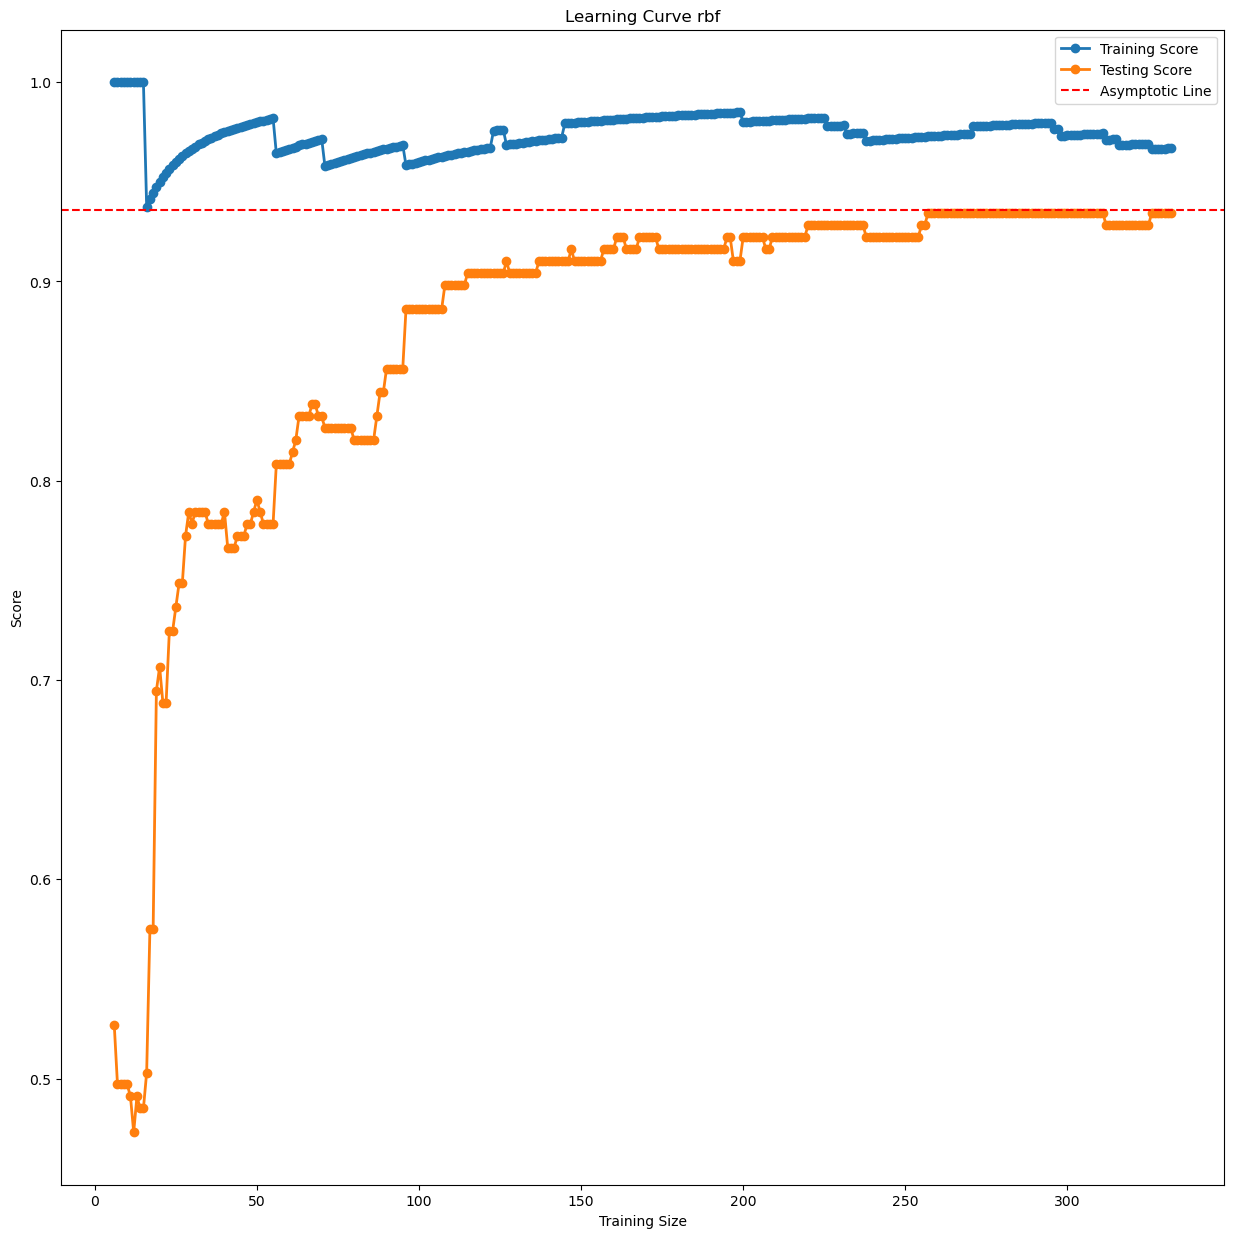

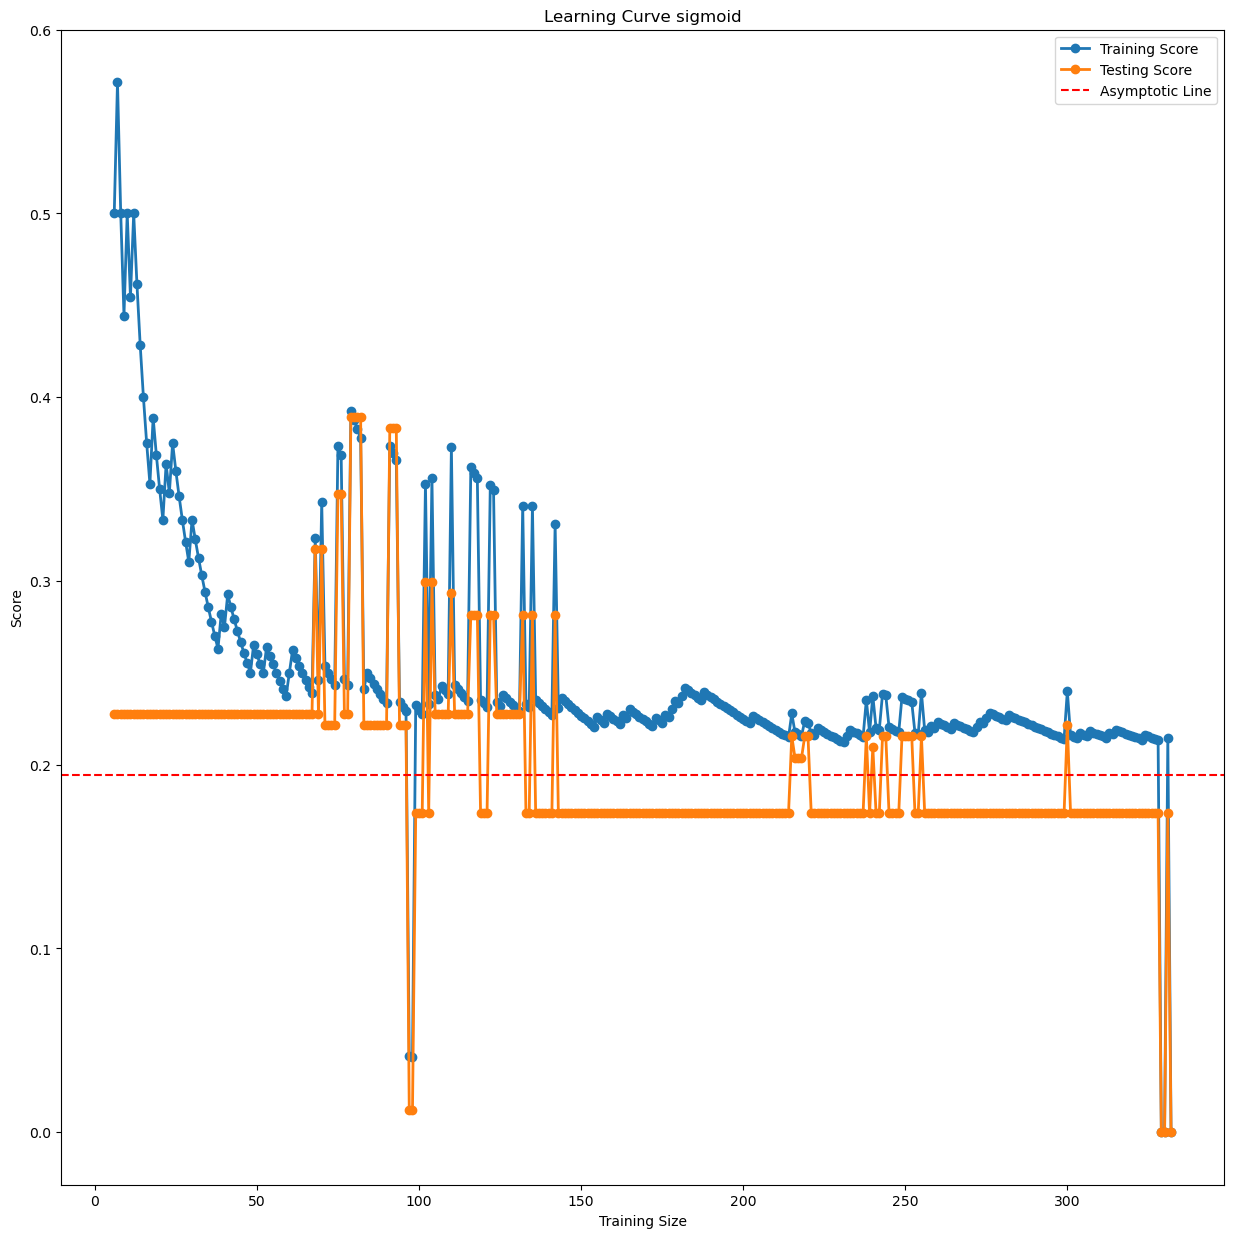

In [153]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

 # your list of testing scores
for kernel in kernels:
    train_sizes = [] # your list of training sizes
    train_scores = [] # your list of training scores
    test_scores = []
    for i in range(6,len(X_train)):
        clf = svm.SVC(C=11.6,gamma=0.013,kernel = kernel,degree = 2,coef0=4.4,decision_function_shape='ovo')
        x_train = X_train[:i]
        y_train_partial =y_train[:i] 
        clf.fit(x_train, y_train_partial)
        predicted = clf.predict(x_train)
        z = metrics.accuracy_score(y_train_partial, predicted)
        train_sizes.append(i)
        train_scores.append(z)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        test_scores.append(z)
    fig = plt.figure(figsize=(15,15))
    plt.plot(train_sizes, train_scores, 'o-', label="Training Score", linewidth=2)
    plt.plot(train_sizes, test_scores, 'o-', label="Testing Score", linewidth=2)

    plt.axhline(y=max(test_scores)/2+min(train_scores)/2, color='r', linestyle='--', label="Asymptotic Line")

    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.title("Learning Curve "+kernel)
    plt.legend(loc="best")

    plt.show()  

# do cross validation

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = svm.SVC(C=11.6,gamma=0.013,kernel = 'linear',degree = 2,coef0=4.4,decision_function_shape='ovo')
scores = cross_val_score(clf, eigenvalues, pointlabels, cv=5)
print(scores.mean())

0.9359999999999999


# move to random forest

## feature selection

### n_estimators

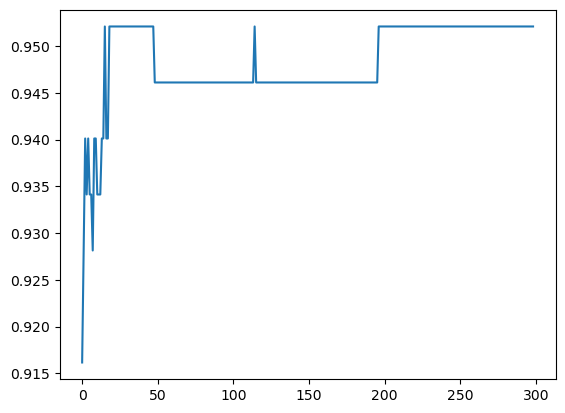

0.9520958083832335 16


In [170]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,300):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=2, random_state=0,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.plot(x_scores)
plt.show()
print(max_accuracy,c)

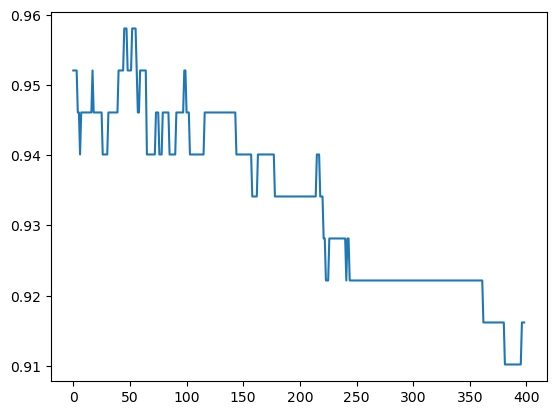

0.9580838323353293 46


In [174]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,400):
    clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=i*0.0001, random_state=0,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.plot(x_scores)
plt.show()
print(max_accuracy,c)

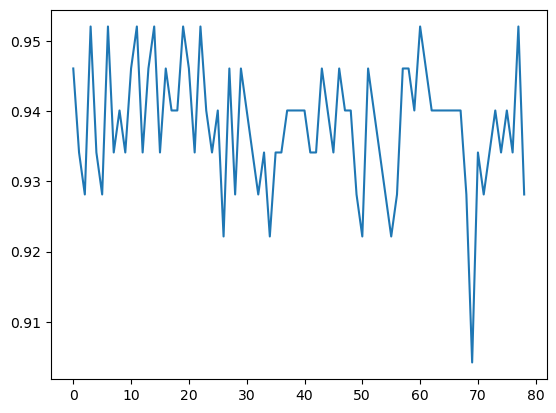

0.9520958083832335 4


In [175]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,80):
    clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=0.0046, random_state=i,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.plot(x_scores)
plt.show()
print(max_accuracy,c)

In [ ]:
x_scores = []
max_accuracy = 0
c = 0
for i in ["gini", "entropy"]:
    clf = RandomForestClassifier(n_estimators=16,criterion=i, min_impurity_decrease=0.0046, random_state=4,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.bar(["gini", "entropy"],x_scores)
plt.show()
print(max_accuracy,c)

# LEARNING CURVE AND CROSS VALIDATION

In [183]:
clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=0.0046, random_state=4,n_jobs=5)
scores = cross_val_score(clf, eigenvalues, pointlabels, cv=5)
print(scores.mean())

0.952


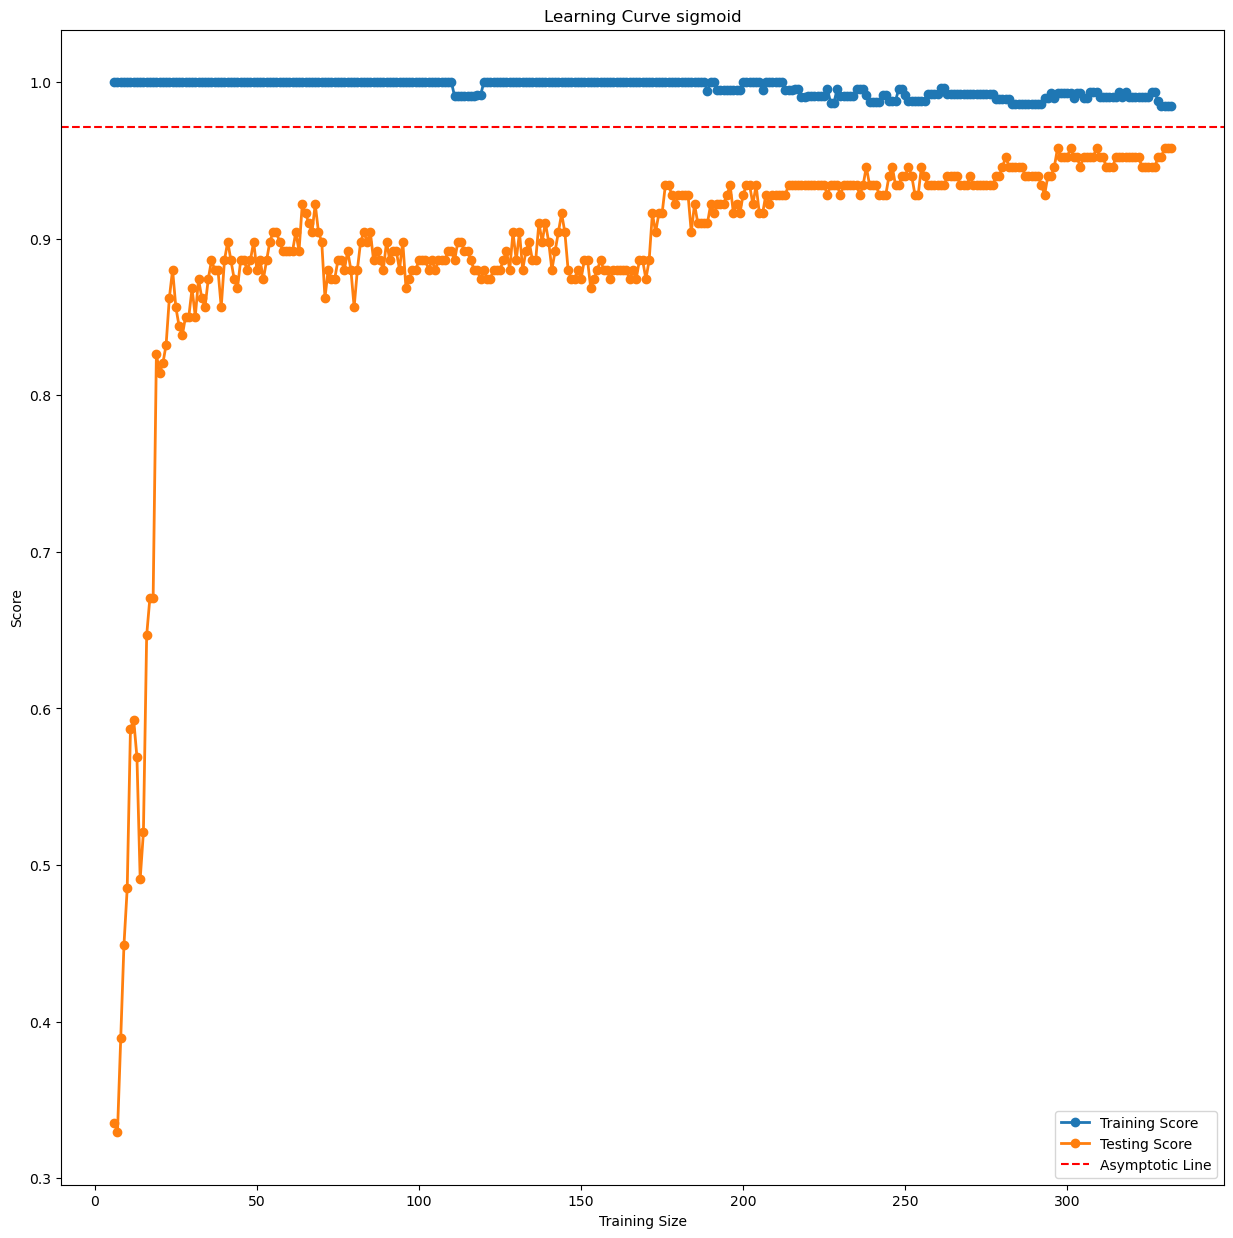

In [186]:
clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=0.0046, random_state=4,n_jobs=5)
train_sizes = [] # your list of training sizes
train_scores = [] # your list of training scores
test_scores = []
for i in range(6,len(X_train)):
        
        x_train = X_train[:i]
        y_train_partial =y_train[:i] 
        clf.fit(x_train, y_train_partial)
        predicted = clf.predict(x_train)
        z = metrics.accuracy_score(y_train_partial, predicted)
        train_sizes.append(i)
        train_scores.append(z)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        test_scores.append(z)
fig = plt.figure(figsize=(15,15))
plt.plot(train_sizes, train_scores, 'o-', label="Training Score", linewidth=2)
plt.plot(train_sizes, test_scores, 'o-', label="Testing Score", linewidth=2)

plt.axhline(y=max(test_scores)/2+min(train_scores)/2, color='r', linestyle='--', label="Asymptotic Line")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve "+kernel)
plt.legend(loc="best")

plt.show() 